In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
import numpy as np
import pandas as pd
import json
from scipy.stats import ks_2samp

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('data/data.json') as data_file:
    data = json.load(data_file)

In [3]:
contexts = {}
for context in data['aggregations']['group_by_context']['buckets']:
    context_id = context['key']
    contexts[context_id] = {}
    for tag in context['group_by_tag']['buckets']:
        tag_id = tag['key']
        series = {}
        for bucket_element in tag['group_by_date']['buckets']:
            series[pd.to_datetime(bucket_element['key_as_string'])] = bucket_element['doc_count']
        contexts[context_id][tag_id] = pd.Series(series).resample('30min').replace(np.nan, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: FutureWarning: 
.resample() is now a deferred operation
You called replace(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


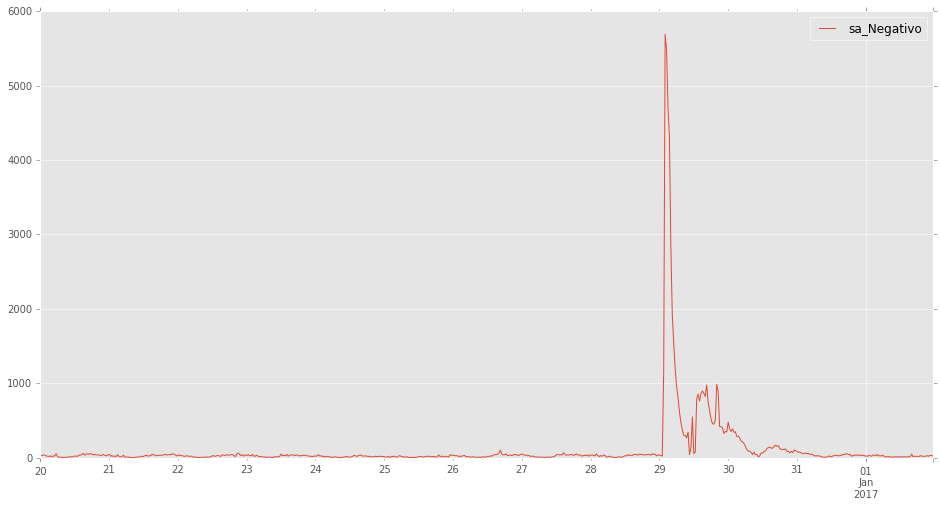

In [10]:
# Agarro un contexto cualquiera, quedaron los ids internos en vez de los nombres de los contextos
series_name='sa_Negativo'
#print(contexts[18479].keys())
series = contexts[18479][series_name][:13*48]
series.plot(legend=True, label=series_name)

In [7]:
s = contexts[18479][series_name]
window_size = 24*2

for i in range(1, 12):
    print("target i=", i)
    base = s[window_size*(i-1):window_size*i]
    target = s[window_size*i:window_size*(i+1)]
    print("target mean", target.mean())
    stat, pvalue = ks_2samp(base, target)
    print("stat=", stat)
    print("pvalue=", pvalue)
    if stat >= 0.25 or pvalue < 0.01:
        print("Anomalia")
    print("-----------------")

target i= 1
target mean 23.5833333333
stat= 0.125
pvalue= 0.821984447161
-----------------
target i= 2
target mean 22.75
stat= 0.104166666667
pvalue= 0.945549071445
-----------------
target i= 3
target mean 21.9583333333
stat= 0.0833333333333
pvalue= 0.994503461755
-----------------
target i= 4
target mean 15.0833333333
stat= 0.375
pvalue= 0.00157245630954
Anomalia
-----------------
target i= 5
target mean 12.6666666667
stat= 0.208333333333
pvalue= 0.219930663327
-----------------
target i= 6
target mean 25.9791666667
stat= 0.5
pvalue= 6.05348220903e-06
Anomalia
-----------------
target i= 7
target mean 25.9375
stat= 0.104166666667
pvalue= 0.945549071445
-----------------
target i= 8
target mean 27.4791666667
stat= 0.0833333333333
pvalue= 0.994503461755
-----------------
target i= 9
target mean 1008.64583333
stat= 0.916666666667
pvalue= 5.63604781607e-19
Anomalia
-----------------
target i= 10
target mean 150.0625
stat= 0.708333333333
pvalue= 1.67746699704e-11
Anomalia
----------------